# Sklearn

In [1]:
import warnings
warnings.filterwarnings("ignore")

import re
import time
import copy

import pandas as pd

## Preparar Dataset

In [2]:
def str_to_category(df, column):
    df = df.copy()  # Does not change original df
    natsort = lambda s: [int(t) if t.isdigit() else t.lower() for t in re.split('(\d+)', s)]

    id_to_str = {}
    df[column] = df[column].astype(str)
    for idx, value in enumerate(sorted(df[column].unique(), key=natsort)):
        df.loc[df[column] == value, column] = idx
        id_to_str[idx] = value

    df[column] = df[column].astype('category')

    return df, id_to_str

### Water Quality and Potability Dataset

https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [3]:
df = pd.read_csv('dataset/water_potability.csv')

num_col_names = list(df.keys())[:-1]
cat_col_names = []
target_col = 'Potability'
df[target_col] = df[target_col].astype('category')

In [4]:
#df = df[['ph', 'Solids', 'Sulfate', 'Potability']]

In [5]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   ph               2785 non-null   float64 
 1   Hardness         3276 non-null   float64 
 2   Solids           3276 non-null   float64 
 3   Chloramines      3276 non-null   float64 
 4   Sulfate          2495 non-null   float64 
 5   Conductivity     3276 non-null   float64 
 6   Organic_carbon   3276 non-null   float64 
 7   Trihalomethanes  3114 non-null   float64 
 8   Turbidity        3276 non-null   float64 
 9   Potability       3276 non-null   category
dtypes: category(1), float64(9)
memory usage: 233.8 KB


In [7]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df[target_col].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [9]:
df = df.dropna()
df[target_col].value_counts()

Potability
0    1200
1     811
Name: count, dtype: int64

In [10]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

## Insurance Lead Prediction Raw Data Dataset

https://www.kaggle.com/datasets/owaiskhan9654/health-insurance-lead-prediction-raw-data

In [11]:
"""
df = pd.read_csv('dataset/Health Insurance Lead Prediction Raw Data.csv')

df = df.drop('ID', axis=1)
df = df.dropna()

df['Holding_Policy_Duration'].replace('14+', 14.0, inplace=True)
df, _ = str_to_category(df, 'City_Code')
df, _ = str_to_category(df, 'Accomodation_Type')
df, _ = str_to_category(df, 'Reco_Insurance_Type')
df, _ = str_to_category(df, 'Is_Spouse')
df, _ = str_to_category(df, 'Health Indicator')
df, _ = str_to_category(df, 'Response')


num_col_names = ['Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Duration', 'Reco_Policy_Premium',]
cat_col_names = ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Type', 'Reco_Policy_Cat']
target_col = 'Response'
"""

"\ndf = pd.read_csv('dataset/Health Insurance Lead Prediction Raw Data.csv')\n\ndf = df.drop('ID', axis=1)\ndf = df.dropna()\n\ndf['Holding_Policy_Duration'].replace('14+', 14.0, inplace=True)\ndf, _ = str_to_category(df, 'City_Code')\ndf, _ = str_to_category(df, 'Accomodation_Type')\ndf, _ = str_to_category(df, 'Reco_Insurance_Type')\ndf, _ = str_to_category(df, 'Is_Spouse')\ndf, _ = str_to_category(df, 'Health Indicator')\ndf, _ = str_to_category(df, 'Response')\n\n\nnum_col_names = ['Region_Code', 'Upper_Age', 'Lower_Age', 'Holding_Policy_Duration', 'Reco_Policy_Premium',]\ncat_col_names = ['City_Code', 'Accomodation_Type', 'Reco_Insurance_Type', 'Is_Spouse', 'Health Indicator', 'Holding_Policy_Type', 'Reco_Policy_Cat']\ntarget_col = 'Response'\n"

In [12]:
#df

### Dataset Split

In [13]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state=42, test_size=0.3)

In [14]:
y_train = train[target_col]
x_train = train.drop(target_col, axis=1)

In [15]:
y_test = test[target_col]
x_test = test.drop(target_col, axis=1)

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [17]:
#from skelarn.preprocessing import MinMaxScaler

#scaler = preprocessing.MinMaxScaler()

In [18]:
x_train = scaler.fit_transform(x_train)
x_train

array([[-0.70089725, -1.09993088, -0.60227016, ...,  0.64481223,
        -0.25629829,  0.13683086],
       [-1.08942192,  1.29796109, -1.37055253, ..., -0.51668481,
         1.27468173, -2.05119824],
       [-1.28616128, -0.05678233, -0.31778142, ..., -1.10622547,
        -0.33223346, -1.07313951],
       ...,
       [ 0.37047885,  0.26468096, -1.59368907, ..., -0.48008136,
         0.04494301,  0.35564011],
       [ 0.55304241,  0.44480174, -0.71925415, ...,  1.20761938,
         3.52182049, -1.42283848],
       [-0.11864529, -1.42518264, -0.68345969, ..., -0.79831645,
         0.54862104,  1.24639292]])

In [19]:
scaler.mean_

array([7.03944564e+00, 1.96252819e+02, 2.20596948e+04, 7.11488352e+00,
       3.31971787e+02, 4.27905441e+02, 1.42862553e+01, 6.65491813e+01,
       3.96530390e+00])

In [20]:
scaler.scale_

array([1.55504516e+00, 3.25567623e+01, 8.56905559e+03, 1.57686615e+00,
       4.08521649e+01, 8.16164007e+01, 3.21596849e+00, 1.63128186e+01,
       7.81210636e-01])

Se utilizar scaler no treinamento, será necessário utilizar nas inferências e como ele foi criado baseado nos dados de treinamento ele só será possível ser recriado com extamente os mesmo dados. Por esse motivo podemos salvá-lo para posteriormente podermos carregá-lo novamente sem a necessidade dos dados de treinamento.

In [21]:
import pickle

# Save
pickle.dump(scaler, open('results/scaler.pkl','wb'))

# Load
scaler = pickle.load(open('results/scaler.pkl','rb'))

In [22]:
x_test = scaler.transform(x_test)

## Treinar um modelo

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeClassifier(max_depth=3)

In [24]:
tic = time.time()
model.fit(x_train, y_train)
print(f'Total time: {time.time() - tic}')

Total time: 0.0039026737213134766


In [25]:
model

DecisionTreeClassifier(max_depth=3)

In [26]:
model.get_depth()

3

In [27]:
model.score(x_test, y_test)

0.6291390728476821

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(model.predict(x_test), y_test)

array([[295, 164],
       [ 60,  85]])

### Variáveis de entra mais importantes para as tomadas de decisão do modelo

0-ph, Score: 0.6200666055853953
1-Hardness, Score: 0.0
2-Solids, Score: 0.08130639566372333
3-Chloramines, Score: 0.0
4-Sulfate, Score: 0.2986269987508814
5-Conductivity, Score: 0.0
6-Organic_carbon, Score: 0.0
7-Trihalomethanes, Score: 0.0
8-Turbidity, Score: 0.0


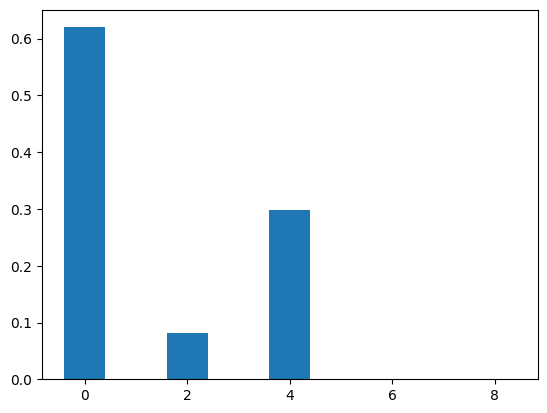

In [29]:
import matplotlib.pyplot as plt

importance = model.feature_importances_
for idx, score in enumerate(importance):
    print(f'{idx}-{df.keys()[idx]}, Score: {score}')

plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Árvore criada pelo modelo

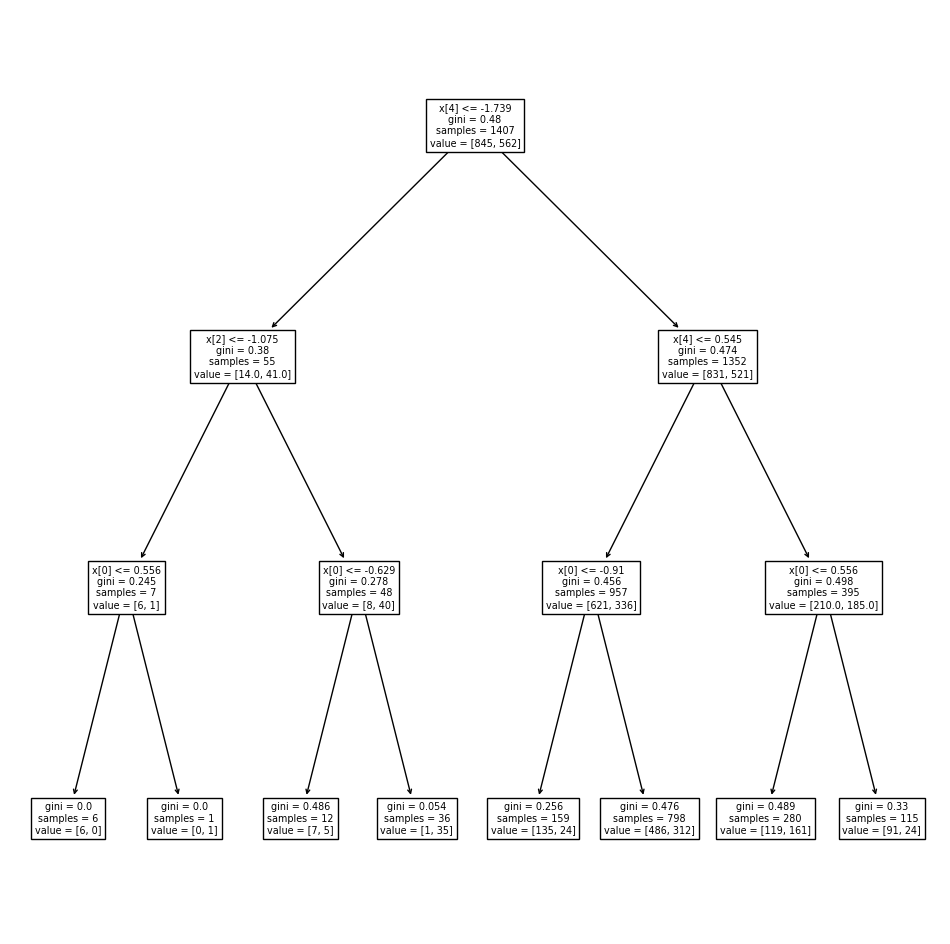

In [30]:
from sklearn import tree

plt.figure(figsize=(12, 12))
tree.plot_tree(model, max_depth=3)
plt.savefig('results/DecisionTree_result.png')

## Treinar diversos estimators disponíveis no Sklearn
https://scikit-learn.org/stable/supervised_learning.html

In [31]:
# https://scikit-learn.org/stable/modules/generated/sklearn.utils.discovery.all_estimators.html#sklearn.utils.discovery.all_estimators
from sklearn.utils import all_estimators

# classifier, regressor, cluster, transformer
estimators = all_estimators(type_filter='classifier')

all_estimators = {}
for name, estimator in estimators:
    try:
        print('Appending', name)
        est = estimator()
        all_estimators[name] = est
    except Exception as e:
        print(e)

Appending AdaBoostClassifier
Appending BaggingClassifier
Appending BernoulliNB
Appending CalibratedClassifierCV
Appending CategoricalNB
Appending ClassifierChain
_BaseChain.__init__() missing 1 required positional argument: 'base_estimator'
Appending ComplementNB
Appending DecisionTreeClassifier
Appending DummyClassifier
Appending ExtraTreeClassifier
Appending ExtraTreesClassifier
Appending GaussianNB
Appending GaussianProcessClassifier
Appending GradientBoostingClassifier
Appending HistGradientBoostingClassifier
Appending KNeighborsClassifier
Appending LabelPropagation
Appending LabelSpreading
Appending LinearDiscriminantAnalysis
Appending LinearSVC
Appending LogisticRegression
Appending LogisticRegressionCV
Appending MLPClassifier
Appending MultiOutputClassifier
MultiOutputClassifier.__init__() missing 1 required positional argument: 'estimator'
Appending MultinomialNB
Appending NearestCentroid
Appending NuSVC
Appending OneVsOneClassifier
OneVsOneClassifier.__init__() missing 1 requi

In [32]:
def run_sklearn_estimators(estimators, x_train, y_train, x_test, y_test, classifier=True):
    # classifier=False == Regression
    
    best_acc = ['', 0.0]  # [estimator_name, accuracy]
    
    for estimator_name, estimator in estimators.items():
        try:
            print(f'##### {estimator_name} #####')

            estimator.fit(x_train, y_train)
            
            result_train = estimator.score(x_train, y_train)
            if classifier:
                print('Train ACC: %.3f%%' % (result_train * 100.00))
            else:
                print('Train error: %.3f' % (result_train))
            
            result_test = estimator.score(x_test, y_test)
            if classifier:
                test_acc = result_test * 100.00
                print('Test ACC: %.3f%%' % (test_acc))
            else:
                test_acc = result_test
                print('Test error: %.3f' % (result_test))
            print()
    
            if (classifier and test_acc > best_acc[1]) or (not classifier and test_acc < best_acc[1]):
                best_acc = [estimator_name, test_acc]
            
            # Confusion Matrix
            if classifier:
                preds = estimator.predict(x_test)
                matrix = confusion_matrix(y_test, preds)
                print("Confusion Matrix Test:")
                print(matrix)
        except Exception as e:
            print(f'Error ({estimator_name}): {e}')

    print('########## Best Estimator ##########')
    print(best_acc)
    
    return estimators, best_acc[0]

In [33]:
tic = time.time()
estimators_trained, best_estimator_name = run_sklearn_estimators(
    all_estimators,
    x_train,
    y_train,
    x_test,
    y_test,
    classifier=True
)
print(f'Total time: {time.time() - tic}')

##### AdaBoostClassifier #####
Train ACC: 67.804%
Test ACC: 58.940%

Confusion Matrix Test:
[[283  72]
 [176  73]]
##### BaggingClassifier #####
Train ACC: 98.507%
Test ACC: 63.079%

Confusion Matrix Test:
[[282  73]
 [150  99]]
##### BernoulliNB #####
Train ACC: 60.057%
Test ACC: 58.775%

Confusion Matrix Test:
[[355   0]
 [249   0]]
##### CalibratedClassifierCV #####
Train ACC: 60.128%
Test ACC: 58.775%

Confusion Matrix Test:
[[355   0]
 [249   0]]
##### CategoricalNB #####
Error (CategoricalNB): Negative values in data passed to CategoricalNB (input X)
##### ComplementNB #####
Error (ComplementNB): Negative values in data passed to ComplementNB (input X)
##### DecisionTreeClassifier #####
Train ACC: 100.000%
Test ACC: 59.106%

Confusion Matrix Test:
[[227 128]
 [119 130]]
##### DummyClassifier #####
Train ACC: 60.057%
Test ACC: 58.775%

Confusion Matrix Test:
[[355   0]
 [249   0]]
##### ExtraTreeClassifier #####
Train ACC: 100.000%
Test ACC: 58.775%

Confusion Matrix Test:
[[234 1

In [34]:
estimators_trained[best_estimator_name]

ExtraTreesClassifier()

### Save Estimator

In [35]:
import pickle

In [36]:
# Save
pickle.dump(estimators_trained[best_estimator_name], open('results/estimator_sklearn.sav', 'wb'))

# Scaler
pickle.dump(scaler, open('results/scaler.pkl','wb'))

### Load Estimator

In [37]:
# Load
loaded_estimator = pickle.load(open('results/estimator_sklearn.sav', 'rb'))

# Scaler
loaded_scaler = pickle.load(open('results/scaler.pkl','rb'))

### Predict

In [38]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [39]:
new_input = [
    [10.2, 200.2, 1900.3, 6.42, 340.3, 360.9, 15.2, 74.1, 4.8],
    [8.316766, 214.373394, 22018.417441, 8.059332, 356.886136, 363.266516, 18.436524, 100.341674, 4.628771]
]

In [40]:
new_input = loaded_scaler.transform(new_input)
new_input

array([[ 2.03245182,  0.12123996, -2.3525807 , -0.44067375,  0.20386221,
        -0.8209801 ,  0.28412739,  0.4628764 ,  1.06846484],
       [ 0.82140403,  0.55658405, -0.00481702,  0.59894017,  0.60986606,
        -0.79198451,  1.29051909,  2.07152998,  0.84928068]])

In [41]:
loaded_estimator.predict(new_input)

array([0, 0])

In [42]:
loaded_estimator.predict_proba(new_input)

array([[0.85, 0.15],
       [1.  , 0.  ]])

## Stacking estimators
Classificador: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier

Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html#sklearn.ensemble.StackingRegressor

In [43]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

In [44]:
stack = StackingClassifier([('estimator1', AdaBoostClassifier()), ('estimator2', SVC())],
                          final_estimator=LogisticRegression())

In [45]:
stack.fit(x_train, y_train)

StackingClassifier(estimators=[('estimator1', AdaBoostClassifier()),
                               ('estimator2', SVC())],
                   final_estimator=LogisticRegression())

In [46]:
stack.score(x_test, y_test)

0.6870860927152318

### Stacking diversas combinações

In [47]:
# https://scikit-learn.org/stable/modules/generated/sklearn.utils.discovery.all_estimators.html#sklearn.utils.discovery.all_estimators
from sklearn.utils import all_estimators

# classifier, regressor, cluster, transformer
estimators = all_estimators(type_filter='classifier')

all_estimators = {}
for name, estimator in estimators:
    try:
        print('Appending', name)
        est = estimator()
        all_estimators[name] = est
    except Exception as e:
        print(e)

Appending AdaBoostClassifier
Appending BaggingClassifier
Appending BernoulliNB
Appending CalibratedClassifierCV
Appending CategoricalNB
Appending ClassifierChain
_BaseChain.__init__() missing 1 required positional argument: 'base_estimator'
Appending ComplementNB
Appending DecisionTreeClassifier
Appending DummyClassifier
Appending ExtraTreeClassifier
Appending ExtraTreesClassifier
Appending GaussianNB
Appending GaussianProcessClassifier
Appending GradientBoostingClassifier
Appending HistGradientBoostingClassifier
Appending KNeighborsClassifier
Appending LabelPropagation
Appending LabelSpreading
Appending LinearDiscriminantAnalysis
Appending LinearSVC
Appending LogisticRegression
Appending LogisticRegressionCV
Appending MLPClassifier
Appending MultiOutputClassifier
MultiOutputClassifier.__init__() missing 1 required positional argument: 'estimator'
Appending MultinomialNB
Appending NearestCentroid
Appending NuSVC
Appending OneVsOneClassifier
OneVsOneClassifier.__init__() missing 1 requi

In [48]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

def run_sklearn_estimators_with_stacking(estimators, x_train, y_train, x_test, y_test, classifier=True):
    best_acc = ['', 0.0]  # [estimator_name, accuracy]
    estimators_stacked_trained = {}
    
    idx = 0
    for estimator_name, estimator in estimators.items():
        count = 0
        for estimator_name2, estimator2 in estimators.items():
            if count <= idx:
                count += 1
                continue
            try:
                print(f'##### {estimator_name} - {estimator_name2} #####')

                if classifier:
                    stack = StackingClassifier([(estimator_name, copy.deepcopy(estimator)), (estimator_name2, copy.deepcopy(estimator2))],
                                              final_estimator=LogisticRegression())
                else:
                    stack = StackingRegressor([(estimator_name, copy.deepcopy(estimator)), (estimator_name2, copy.deepcopy(estimator2))],
                                              final_estimator=RidgeCV())

                stack.fit(x_train, y_train)
                
                result_train = stack.score(x_train, y_train)
                if classifier:
                    print('Train ACC: %.3f%%' % (result_train * 100.00))
                else:
                    print('Train error: %.3f' % (result_train))
                
                result_test = stack.score(x_test, y_test)
                if classifier:
                    test_acc = result_test * 100.00
                    print('Test ACC: %.3f%%' % (test_acc))
                else:
                    test_acc = result_test
                    print('Test error: %.3f' % (result_test))
        
                if (classifier and test_acc > best_acc[1]) or (not classifier and test_acc < best_acc[1]):
                    best_acc = [f'{estimator_name}-{estimator_name2}', test_acc]
                
                # Confusion Matrix
                if classifier:
                    preds = stack.predict(x_test)
                    matrix = confusion_matrix(y_test, preds)
                    print("Confusion Matrix Test:")
                    print(matrix)

                estimators_stacked_trained[f'{estimator_name}-{estimator_name2}'] = copy.deepcopy(stack)
            except Exception as e:
                print(f'Error ({estimator_name}-{estimator_name2}): {e}')
                continue
        
        idx += 1

    print('########## Best Estimator ##########')
    print(best_acc)
    
    return estimators_stacked_trained, best_acc[0]

In [49]:
tic = time.time()
estimators_stacked_trained, best_staked_estimator_name = run_sklearn_estimators_with_stacking(
    all_estimators,
    x_train,
    y_train,
    x_test,
    y_test,
    classifier=True
)
print(f'Total time: {time.time() - tic}')

##### AdaBoostClassifier - BaggingClassifier #####
Train ACC: 95.593%
Test ACC: 63.907%
Confusion Matrix Test:
[[312  43]
 [175  74]]
##### AdaBoostClassifier - BernoulliNB #####
Train ACC: 60.057%
Test ACC: 58.775%
Confusion Matrix Test:
[[355   0]
 [249   0]]
##### AdaBoostClassifier - CalibratedClassifierCV #####
Train ACC: 60.057%
Test ACC: 58.775%
Confusion Matrix Test:
[[355   0]
 [249   0]]
##### AdaBoostClassifier - CategoricalNB #####
Error (AdaBoostClassifier-CategoricalNB): Negative values in data passed to CategoricalNB (input X)
##### AdaBoostClassifier - ComplementNB #####
Error (AdaBoostClassifier-ComplementNB): Negative values in data passed to ComplementNB (input X)
##### AdaBoostClassifier - DecisionTreeClassifier #####
Train ACC: 60.697%
Test ACC: 59.106%
Confusion Matrix Test:
[[355   0]
 [247   2]]
##### AdaBoostClassifier - DummyClassifier #####
Train ACC: 60.057%
Test ACC: 58.775%
Confusion Matrix Test:
[[355   0]
 [249   0]]
##### AdaBoostClassifier - ExtraTreeC

## GridSearch

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [50]:
len(range(2, 50))

48

In [51]:
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier()
# Train 144 (3 * 48) times
params = [{
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': range(2, 50)
    }]

estimator_grid = GridSearchCV(estimator, params)

In [52]:
tic = time.time()
estimator_grid.fit(x_train, y_train)
print(f'Total time: {time.time() - tic}')

Total time: 9.351382493972778


In [53]:
estimator_grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [54]:
estimator_grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [55]:
estimator_grid.best_estimator_.score(x_test, y_test)

0.6440397350993378

In [56]:
# Save
pickle.dump(estimator_grid.best_estimator_, open('results/estimator_sklearn_grid.sav', 'wb'))

pickle.dump(scaler, open('results/scaler.pkl','wb'))

# Load
loaded_estimator = pickle.load(open('results/estimator_sklearn_grid.sav', 'rb'))

scaler = pickle.load(open('results/scaler.pkl','rb'))